In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

**Preprocessing of Data**

In [2]:
seller_df = pd.read_excel(r"C:\Users\lavah\Downloads\Razor\Sample_Longlist_Data.xlsx")
seller_df.head()

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,...,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,...,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...,NaN,NaN,NaN
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,Business Name:1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,...,2,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...,NaN,NaN,NaN
2,2020-11-15,Garden,Seller 3,Seller 3-link,Seller 3-storefrontlink,"1-16 of over 2,000 results",85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,Business Name:nantongaohuanfangzhipinyouxiango...,zhongnanshijicheng27zhuang1410haochongchuanqun...,...,0,25,12,164,162,TXYFYP,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,NaN,NaN,NaN
3,2020-11-15,Garden,Seller 4,Seller 4-link,Seller 4-storefrontlink,1-16 of 123 results,NaN,7 days home life supermarket is committed to p...,Business Name:Zhengzhou Yaoqiong Trading Company,河南省中兴南路福禄街自贸试验区郑州片区（郑东）河南商会大厦1901室450000CN,...,0,0,0,0,0,SHIFENG,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,NaN,NaN,NaN
4,2020-11-15,Garden,Seller 5,Seller 5-link,Seller 5-storefrontlink,"1-16 of over 1,000 results",81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each cus...,Business Name:shenzhenfeichangshangmeimaoyiyou...,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,...,0,31,15,224,113,YUOKI99,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,NaN,NaN,NaN


In [3]:
seller_df.columns

Index(['Date Added', 'category', 'sellerlink', 'sellerlink-url',
       'sellerstorefront-url', 'sellerproductcount', 'sellerratings',
       'sellerdetails', 'seller business name', 'businessaddress',
       'Count of seller brands',
       'Max % of negative seller ratings - last 30 days',
       'Max % of negative seller ratings - last 90 days',
       'Max % of negative seller ratings - last 12 months',
       'Hero Product 1 #ratings', 'Hero Product 2 #ratings',
       'Sample brand name', 'Sample Brand URL', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20'],
      dtype='object')

In [4]:
#Removing Unnamed Columns
seller_df = seller_df.loc[:,~seller_df.columns.str.contains('^Unnamed')]
seller_df.head()

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,Business Name:1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,0,2,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...
2,2020-11-15,Garden,Seller 3,Seller 3-link,Seller 3-storefrontlink,"1-16 of over 2,000 results",85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,Business Name:nantongaohuanfangzhipinyouxiango...,zhongnanshijicheng27zhuang1410haochongchuanqun...,15,0,25,12,164,162,TXYFYP,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
3,2020-11-15,Garden,Seller 4,Seller 4-link,Seller 4-storefrontlink,1-16 of 123 results,NaN,7 days home life supermarket is committed to p...,Business Name:Zhengzhou Yaoqiong Trading Company,河南省中兴南路福禄街自贸试验区郑州片区（郑东）河南商会大厦1901室450000CN,1,0,0,0,0,0,SHIFENG,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
4,2020-11-15,Garden,Seller 5,Seller 5-link,Seller 5-storefrontlink,"1-16 of over 1,000 results",81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each cus...,Business Name:shenzhenfeichangshangmeimaoyiyou...,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,16,0,31,15,224,113,YUOKI99,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...


In [5]:
seller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Date Added                                         1839 non-null   datetime64[ns]
 1   category                                           1839 non-null   object        
 2   sellerlink                                         1839 non-null   object        
 3   sellerlink-url                                     1839 non-null   object        
 4   sellerstorefront-url                               1839 non-null   object        
 5   sellerproductcount                                 1513 non-null   object        
 6   sellerratings                                      1411 non-null   object        
 7   sellerdetails                                      1812 non-null   object        
 8   seller business na

In [6]:
#Parsing Seller Product Count
seller_df['n_sellerproductcount'] = seller_df['sellerproductcount']
seller_df['n_sellerproductcount']

0       1-16 of over 100,000 results
1                                NaN
2         1-16 of over 2,000 results
3                1-16 of 123 results
4         1-16 of over 1,000 results
                    ...             
1834      1-16 of over 2,000 results
1835      1-16 of over 5,000 results
1836     1-16 of over 10,000 results
1837             1-16 of 473 results
1838     1-16 of over 20,000 results
Name: n_sellerproductcount, Length: 1839, dtype: object

In [7]:
#Replacing non numeric characters with identifier
seller_df['n_sellerproductcount']=seller_df['n_sellerproductcount'].str.strip().str.replace('\(|[a-zA-Z]+', '_', regex=True) 
seller_df['n_sellerproductcount']

0       1-16 _ _ 100,000 _
1                      NaN
2         1-16 _ _ 2,000 _
3             1-16 _ 123 _
4         1-16 _ _ 1,000 _
               ...        
1834      1-16 _ _ 2,000 _
1835      1-16 _ _ 5,000 _
1836     1-16 _ _ 10,000 _
1837          1-16 _ 473 _
1838     1-16 _ _ 20,000 _
Name: n_sellerproductcount, Length: 1839, dtype: object

In [8]:
#Splitting the string on identifiers and calling the second last object of the list
seller_df['n_sellerproductcount']=seller_df['n_sellerproductcount'].str.split('_').str[-2]
seller_df['n_sellerproductcount']

0        100,000 
1             NaN
2          2,000 
3            123 
4          1,000 
          ...    
1834       2,000 
1835       5,000 
1836      10,000 
1837         473 
1838      20,000 
Name: n_sellerproductcount, Length: 1839, dtype: object

In [9]:
#Removing leading/trailing whitespaces
seller_df['n_sellerproductcount'] = seller_df['n_sellerproductcount'].str.strip()
seller_df['n_sellerproductcount']

0       100,000
1           NaN
2         2,000
3           123
4         1,000
         ...   
1834      2,000
1835      5,000
1836     10,000
1837        473
1838     20,000
Name: n_sellerproductcount, Length: 1839, dtype: object

In [10]:
#Converting product count string to float by removing comma symbol
seller_df['n_sellerproductcount']= seller_df['n_sellerproductcount'].str.replace(',', '').astype(float)
seller_df['n_sellerproductcount']

0       100000.0
1            NaN
2         2000.0
3          123.0
4         1000.0
          ...   
1834      2000.0
1835      5000.0
1836     10000.0
1837       473.0
1838     20000.0
Name: n_sellerproductcount, Length: 1839, dtype: float64

In [11]:
#Replacing NaN with 0
seller_df['n_sellerproductcount']= seller_df['n_sellerproductcount'].fillna(0)
seller_df['n_sellerproductcount']

0       100000.0
1            0.0
2         2000.0
3          123.0
4         1000.0
          ...   
1834      2000.0
1835      5000.0
1836     10000.0
1837       473.0
1838     20000.0
Name: n_sellerproductcount, Length: 1839, dtype: float64

In [12]:
#Validating Parsing
seller_df[['sellerproductcount','n_sellerproductcount']]

,sellerproductcount,n_sellerproductcount
0,"1-16 of over 100,000 results",100000.0
1,NaN,0.0
2,"1-16 of over 2,000 results",2000.0
3,1-16 of 123 results,123.0
4,"1-16 of over 1,000 results",1000.0
...,...,...
1834,"1-16 of over 2,000 results",2000.0
1835,"1-16 of over 5,000 results",5000.0
1836,"1-16 of over 10,000 results",10000.0
1837,1-16 of 473 results,473.0


In [13]:
seller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 19 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Date Added                                         1839 non-null   datetime64[ns]
 1   category                                           1839 non-null   object        
 2   sellerlink                                         1839 non-null   object        
 3   sellerlink-url                                     1839 non-null   object        
 4   sellerstorefront-url                               1839 non-null   object        
 5   sellerproductcount                                 1513 non-null   object        
 6   sellerratings                                      1411 non-null   object        
 7   sellerdetails                                      1812 non-null   object        
 8   seller business na

In [14]:
#Parsing seller rating data to extract total rating count and %positive raing count
seller_df['n_sellerratings'] = seller_df['sellerratings']
seller_df['n_sellerratings']

0       88% positive in the last 12 months (118 ratings)
1       90% positive in the last 12 months (566 ratings)
2        85% positive in the last 12 months (75 ratings)
3                                                    NaN
4        81% positive in the last 12 months (52 ratings)
                              ...                       
1834     83% positive in the last 12 months (46 ratings)
1835                                                 NaN
1836              0% positive lifetime (1 total ratings)
1837             67% positive lifetime (3 total ratings)
1838            100% positive lifetime (2 total ratings)
Name: n_sellerratings, Length: 1839, dtype: object

In [15]:
##Replacing non numeric characters with identifier
seller_df['n_sellerratings']=seller_df['n_sellerratings'].str.strip().str.replace('\)|[a-zA-Z]+', '_', regex=True)
seller_df['n_sellerratings']

0       88% _ _ _ _ 12 _ (118 __
1       90% _ _ _ _ 12 _ (566 __
2        85% _ _ _ _ 12 _ (75 __
3                            NaN
4        81% _ _ _ _ 12 _ (52 __
                  ...           
1834     83% _ _ _ _ 12 _ (46 __
1835                         NaN
1836              0% _ _ (1 _ __
1837             67% _ _ (3 _ __
1838            100% _ _ (2 _ __
Name: n_sellerratings, Length: 1839, dtype: object

In [16]:
#Parsing past 12 month and lifetime positivity rate
seller_df['positivity_rate']=seller_df['n_sellerratings'].str.split('%').str[0]
seller_df['positivity_rate']=seller_df['positivity_rate'].astype(float)
#Replacing NaN with 0
seller_df['positivity_rate'].fillna(0,inplace=True)
seller_df['positivity_rate']

0        88.0
1        90.0
2        85.0
3         0.0
4        81.0
        ...  
1834     83.0
1835      0.0
1836      0.0
1837     67.0
1838    100.0
Name: positivity_rate, Length: 1839, dtype: float64

In [17]:
#Parsing past 12 month and lifetime rating count
seller_df['rating_count']=seller_df['n_sellerratings'].str.split('(').str[1]
seller_df['rating_count']

0       118 __
1       566 __
2        75 __
3          NaN
4        52 __
         ...  
1834     46 __
1835       NaN
1836    1 _ __
1837    3 _ __
1838    2 _ __
Name: rating_count, Length: 1839, dtype: object

In [18]:
#Extracting total rating count value and validating dtype and NaN
seller_df['rating_count'] = seller_df['rating_count'].str.split(' ').str[0]
seller_df['rating_count'] = seller_df['rating_count'].astype(float)
seller_df['rating_count'] = seller_df['rating_count'].fillna(0)
seller_df['rating_count']

0       118.0
1       566.0
2        75.0
3         0.0
4        52.0
        ...  
1834     46.0
1835      0.0
1836      1.0
1837      3.0
1838      2.0
Name: rating_count, Length: 1839, dtype: float64

In [19]:
#Dropping unneccessary column
seller_df = seller_df.drop(['n_sellerratings'],axis=1)
#validating parsing
seller_df[['sellerratings','positivity_rate','rating_count']]

,sellerratings,positivity_rate,rating_count
0,88% positive in the last 12 months (118 ratings),88.0,118.0
1,90% positive in the last 12 months (566 ratings),90.0,566.0
2,85% positive in the last 12 months (75 ratings),85.0,75.0
3,NaN,0.0,0.0
4,81% positive in the last 12 months (52 ratings),81.0,52.0
...,...,...,...
1834,83% positive in the last 12 months (46 ratings),83.0,46.0
1835,NaN,0.0,0.0
1836,0% positive lifetime (1 total ratings),0.0,1.0
1837,67% positive lifetime (3 total ratings),67.0,3.0


In [20]:
#Parsing Phone and Email Contacts
seller_df['sellerdetails']

0       Lohas Living Inc James Mazzello US 845 3RD Ave...
1       Herzlich Willkommen im Amazon Shop von 1a-Hand...
2       67878u6i7 is committed to providing each custo...
3       7 days home life supermarket is committed to p...
4       78 68yui678 is committed to providing each cus...
                              ...                        
1834    ZZM Store is committed to providing each custo...
1835    ZZMIARY is committed to providing each custome...
1836    zzshd75 is committed to providing each custome...
1837    ZZY xiaodian is committed to providing each cu...
1838    zzzswbl is committed to providing each custome...
Name: sellerdetails, Length: 1839, dtype: object

In [21]:
#Function to access strings leading/trailing of @ to capture email address
def find_email(text):
    email = re.findall(r'[\w\.-]+@[\w\.-]+',str(text))
    return ",".join(email)

In [22]:
seller_df['seller_email'] = seller_df['sellerdetails'].apply(lambda x: find_email(x))
seller_df['seller_email'].fillna(0)

0                                   jadgemaello@gmail.com
1       info@1a-handelsagentur.de,info@1a-handelsagent...
2                                                        
3                                                        
4                                                        
                              ...                        
1834                                                     
1835                                                     
1836                                                     
1837                                                     
1838                                                     
Name: seller_email, Length: 1839, dtype: object

In [23]:
seller_df[['sellerdetails','seller_email']].iloc[:3]

,sellerdetails,seller_email
0,Lohas Living Inc James Mazzello US 845 3RD Ave...,jadgemaello@gmail.com
1,Herzlich Willkommen im Amazon Shop von 1a-Hand...,"info@1a-handelsagentur.de,info@1a-handelsagent..."
2,67878u6i7 is committed to providing each custo...,


In [24]:
seller_df['seller_email'] = seller_df['seller_email'].replace(r'^\s*$', 'Not Available', regex=True)

In [25]:
seller_df['seller_email'].iloc[:16]

0                                 jadgemaello@gmail.com
1     info@1a-handelsagentur.de,info@1a-handelsagent...
2                                         Not Available
3                                         Not Available
4                                         Not Available
5                                         Not Available
6                                         Not Available
7                                         Not Available
8                                         Not Available
9                                         Not Available
10                                        Not Available
11                                        Not Available
12                                        Not Available
13                                        Not Available
14                               webmaster@9pm-store.de
15                                        Not Available
Name: seller_email, dtype: object

In [26]:
#Parsing phone contact
seller_df['sellerdetails']

0       Lohas Living Inc James Mazzello US 845 3RD Ave...
1       Herzlich Willkommen im Amazon Shop von 1a-Hand...
2       67878u6i7 is committed to providing each custo...
3       7 days home life supermarket is committed to p...
4       78 68yui678 is committed to providing each cus...
                              ...                        
1834    ZZM Store is committed to providing each custo...
1835    ZZMIARY is committed to providing each custome...
1836    zzshd75 is committed to providing each custome...
1837    ZZY xiaodian is committed to providing each cu...
1838    zzzswbl is committed to providing each custome...
Name: sellerdetails, Length: 1839, dtype: object

In [27]:
#Function for phone numnber
def find_phone(text):
    email = re.findall(r'(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4})',str(text))
    return ",".join(email)

In [28]:
seller_df['seller_phone']=seller_df['sellerdetails'].apply(lambda x: find_phone(x))
seller_df['seller_phone']

0       022-6630,208-964-6807,022-6630,208-964-6807,09...
1                                     039932-8297,2237584
2                                                        
3                                                        
4                                                        
                              ...                        
1834                                                     
1835                                                     
1836                                                     
1837                                                     
1838                                                     
Name: seller_phone, Length: 1839, dtype: object

In [29]:
seller_df['seller_phone'] = seller_df['seller_phone'].replace(r'^\s*$', 'Not Available', regex=True)

In [30]:
seller_df['seller_phone'].head(25)

0     022-6630,208-964-6807,022-6630,208-964-6807,09...
1                                   039932-8297,2237584
2                                         Not Available
3                                         Not Available
4                                         Not Available
5                                         Not Available
6                                         Not Available
7                                         Not Available
8                                         Not Available
9                                         Not Available
10                                        Not Available
11                                        Not Available
12                                        Not Available
13                                        Not Available
14                                   0151400085,2157520
15                                        Not Available
16                                        Not Available
17                                              

In [31]:
#Identifying Seller locale or country from 'businessaddress'
seller_df['businessaddress']

0       411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...
1       1a HandelsagenturLindenallee 2MalchowMecklenbu...
2       zhongnanshijicheng27zhuang1410haochongchuanqun...
3              河南省中兴南路福禄街自贸试验区郑州片区（郑东）河南商会大厦1901室450000CN
4       minzhidadaoshaxialaocun94dongA901longhuaxinqus...
                              ...                        
1834    Longhuaxinqu Longhuajiedao YousongDiergongyequ...
1835    hebeishengshijiazhuangshiwujixiangaotouxiangxi...
1836    lankaoxianzhangjunmuzhenzhengzhuangcunerzukaif...
1837    bei san huan da ming gong jian cai shi changba...
1838    honggutanxinquhuanandongerlu99haolongxiangyuan...
Name: businessaddress, Length: 1839, dtype: object

In [32]:
seller_df['region'] = seller_df['businessaddress'].str[-2:]
seller_df['region'].head(10)

0     US
1     DE
2     CN
3     CN
4     CN
5    NaN
6     CN
7     CN
8     CN
9     CN
Name: region, dtype: object

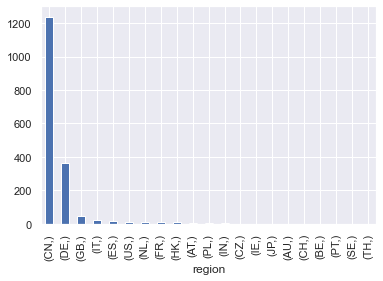

In [33]:
k=seller_df.value_counts(['region']).plot(kind='bar')

In [34]:
#70% sellers are from CN region
seller_df.value_counts(['region'])

region
CN        1237
DE         364
GB          47
IT          25
ES          15
US          14
NL          12
FR          11
HK          10
AT           8
PL           5
IN           4
CZ           2
IE           2
JP           2
AU           1
CH           1
BE           1
PT           1
SE           1
TH           1
dtype: int64

In [35]:
seller_df.corr()

,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,n_sellerproductcount,positivity_rate,rating_count
Count of seller brands,1.000000,0.082506,0.070420,0.057986,0.288688,0.257157,0.143717,0.248524,0.030506
Max % of negative seller ratings - last 30 days,0.082506,1.000000,0.627317,0.331155,0.024586,0.029462,0.052767,0.006053,0.000883
Max % of negative seller ratings - last 90 days,0.070420,0.627317,1.000000,0.587154,-0.001267,0.001814,0.060223,-0.075488,-0.011291
Max % of negative seller ratings - last 12 months,0.057986,0.331155,0.587154,1.000000,-0.038806,-0.038915,0.059117,-0.179033,-0.039268
Hero Product 1 #ratings,0.288688,0.024586,-0.001267,-0.038806,1.000000,0.912775,0.214622,0.148120,0.147670
Hero Product 2 #ratings,0.257157,0.029462,0.001814,-0.038915,0.912775,1.000000,0.209922,0.133704,0.112768
n_sellerproductcount,0.143717,0.052767,0.060223,0.059117,0.214622,0.209922,1.000000,0.027944,0.063547
positivity_rate,0.248524,0.006053,-0.075488,-0.179033,0.148120,0.133704,0.027944,1.000000,0.111487
rating_count,0.030506,0.000883,-0.011291,-0.039268,0.147670,0.112768,0.063547,0.111487,1.000000


<AxesSubplot:>

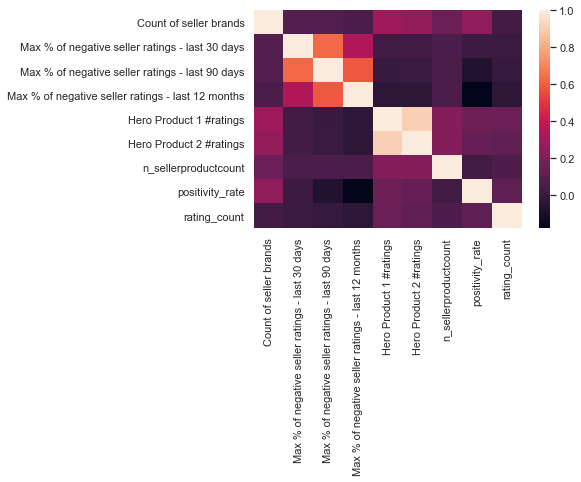

In [36]:
sns.heatmap(seller_df.corr())

In [37]:
seller_df.head()

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,...,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL,n_sellerproductcount,positivity_rate,rating_count,seller_email,seller_phone,region
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,...,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...,100000.0,88.0,118.0,jadgemaello@gmail.com,"022-6630,208-964-6807,022-6630,208-964-6807,09...",US
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,Business Name:1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,...,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...,0.0,90.0,566.0,"info@1a-handelsagentur.de,info@1a-handelsagent...","039932-8297,2237584",DE
2,2020-11-15,Garden,Seller 3,Seller 3-link,Seller 3-storefrontlink,"1-16 of over 2,000 results",85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,Business Name:nantongaohuanfangzhipinyouxiango...,zhongnanshijicheng27zhuang1410haochongchuanqun...,...,164,162,TXYFYP,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,2000.0,85.0,75.0,Not Available,Not Available,CN
3,2020-11-15,Garden,Seller 4,Seller 4-link,Seller 4-storefrontlink,1-16 of 123 results,NaN,7 days home life supermarket is committed to p...,Business Name:Zhengzhou Yaoqiong Trading Company,河南省中兴南路福禄街自贸试验区郑州片区（郑东）河南商会大厦1901室450000CN,...,0,0,SHIFENG,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,123.0,0.0,0.0,Not Available,Not Available,CN
4,2020-11-15,Garden,Seller 5,Seller 5-link,Seller 5-storefrontlink,"1-16 of over 1,000 results",81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each cus...,Business Name:shenzhenfeichangshangmeimaoyiyou...,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,...,224,113,YUOKI99,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,1000.0,81.0,52.0,Not Available,Not Available,CN


**Data Modeling and Feature Selection**

In [38]:
#Selecting sellers from only only Non'CN' region
seller_df_main = seller_df[seller_df['region'] !='CN']
seller_df_main = seller_df_main
seller_df_main.set_index('sellerlink')

,Date Added,category,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,Count of seller brands,...,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL,n_sellerproductcount,positivity_rate,rating_count,seller_email,seller_phone,region
sellerlink,,,,,,,,,,,,,,,,,,,,,
Seller 1,2020-11-15,Garden,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,16,...,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...,100000.0,88.0,118.0,jadgemaello@gmail.com,"022-6630,208-964-6807,022-6630,208-964-6807,09...",US
Seller 2,2020-11-15,Garden,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,Business Name:1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,0,...,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...,0.0,90.0,566.0,"info@1a-handelsagentur.de,info@1a-handelsagent...","039932-8297,2237584",DE
Seller 6,2020-11-15,Garden,Seller 6-link,Seller 6-storefrontlink,1-16 of 28 results,NaN,7830jeff is committed to providing each custom...,NaN,NaN,13,...,3284,2944,Strata,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,28.0,0.0,0.0,Not Available,Not Available,NaN
Seller 15,2020-11-15,Garden,Seller 15-link,Seller 15-storefrontlink,1-16 of 919 results,97% positive in the last 12 months (116 ratings),Impressum\n \n Gesetzliche Anbieterkennung:\n ...,Business Name:Oliver Mills,Kaiserstr.12Borgholzhausen33829DE,15,...,1446,921,Unbekannt,https://www.amazon.de/-/en/Unbekannt/b/ref=bl_...,919.0,97.0,116.0,webmaster@9pm-store.de,"0151400085,2157520",DE
Seller 20,2020-11-15,Garden,Seller 20-link,Seller 20-storefrontlink,NaN,76% positive in the last 12 months (3721 ratings),Impressum: ABC-Schnäppchenmarkt GmbH \n Jösser...,Business Name:ABC-Schnäppchenmarkt GmbH,Jösser Weg10Petershagen32469DE,0,...,0,0,Visit the TFA Dostmann Store,https://www.amazon.de/-/en/stores/TFA+Dostmann...,0.0,76.0,3721.0,abc-markt@web.de,"0570591155,0570591156,2138231",DE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Seller 1809,2020-11-15,Garden,Seller 1809-link,Seller 1809-storefrontlink,1-16 of 52 results,100% positive in the last 12 months (16 ratings),Zündholz Riesa is committed to providing each ...,Business Name:AD-ACCESS-Zündholz Riesa GmbH,Paul-Greifzu-Straße22Riesa01591DE,8,...,65,41,NOLA,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,52.0,100.0,16.0,Not Available,Not Available,DE
Seller 1814,2020-11-15,Garden,Seller 1814-link,Seller 1814-storefrontlink,1-16 of 177 results,100% positive in the last 12 months (10 ratings),Impressum:\n\nStephanie Severt\n\nZUR ROSA KUH...,VAT Number:DE815289413,NaN,15,...,91,18,Rice,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,177.0,100.0,10.0,"info@zurrosakuh.de,info@zurrosakuh.de","4729886,8152894",NaN
Seller 1815,2020-11-15,Garden,Seller 1815-link,Seller 1815-storefrontlink,"1-16 of over 1,000 results",91% positive in the last 12 months (3075 ratings),Reinhard Joormann -FansandTrends- e.K. Im St...,Business Name:Reinhard Joormann -FansandTrends...,Im Stadtsfeld 55Dorsten46282DE,15,...,636,466,Star-Max,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,1000.0,91.0,3075.0,"r.joormann@googlemail.com,r.joormann@googlemai...","0236260578,8147722,0236260578",DE


In [39]:
seller_df_main_feature = seller_df_main[['sellerlink','Count of seller brands','Max % of negative seller ratings - last 30 days',
                                        'Max % of negative seller ratings - last 90 days',
                                        'Max % of negative seller ratings - last 12 months',
                                        'Hero Product 1 #ratings',
                                        'Hero Product 2 #ratings',
                                        'n_sellerproductcount',
                                         'positivity_rate',
                                         'rating_count']].set_index('sellerlink')

In [40]:
seller_df_main_feature

,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,n_sellerproductcount,positivity_rate,rating_count
sellerlink,,,,,,,,,
Seller 1,16,17,11,12,5873,4957,100000.0,88.0,118.0
Seller 2,0,2,2,9,0,0,0.0,90.0,566.0
Seller 6,13,0,0,0,3284,2944,28.0,0.0,0.0
Seller 15,15,0,0,3,1446,921,919.0,97.0,116.0
Seller 20,0,18,20,20,0,0,0.0,76.0,3721.0
...,...,...,...,...,...,...,...,...,...
Seller 1809,8,0,0,0,65,41,52.0,100.0,16.0
Seller 1814,15,0,0,0,91,18,177.0,100.0,10.0
Seller 1815,15,6,8,7,636,466,1000.0,91.0,3075.0


In [41]:
seller_df_main_feature.corr()

,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,n_sellerproductcount,positivity_rate,rating_count
Count of seller brands,1.000000,0.074030,0.027902,-0.013884,0.328208,0.291280,0.157425,0.271527,-0.041509
Max % of negative seller ratings - last 30 days,0.074030,1.000000,0.665006,0.344237,0.052991,0.068125,0.072542,-0.042897,0.000496
Max % of negative seller ratings - last 90 days,0.027902,0.665006,1.000000,0.604171,0.037172,0.048552,0.143237,-0.127671,-0.004850
Max % of negative seller ratings - last 12 months,-0.013884,0.344237,0.604171,1.000000,-0.004112,-0.000745,0.139477,-0.260862,-0.034384
Hero Product 1 #ratings,0.328208,0.052991,0.037172,-0.004112,1.000000,0.906141,0.288166,0.095987,0.097035
Hero Product 2 #ratings,0.291280,0.068125,0.048552,-0.000745,0.906141,1.000000,0.278188,0.083438,0.064815
n_sellerproductcount,0.157425,0.072542,0.143237,0.139477,0.288166,0.278188,1.000000,0.003358,0.081094
positivity_rate,0.271527,-0.042897,-0.127671,-0.260862,0.095987,0.083438,0.003358,1.000000,0.086340
rating_count,-0.041509,0.000496,-0.004850,-0.034384,0.097035,0.064815,0.081094,0.086340,1.000000


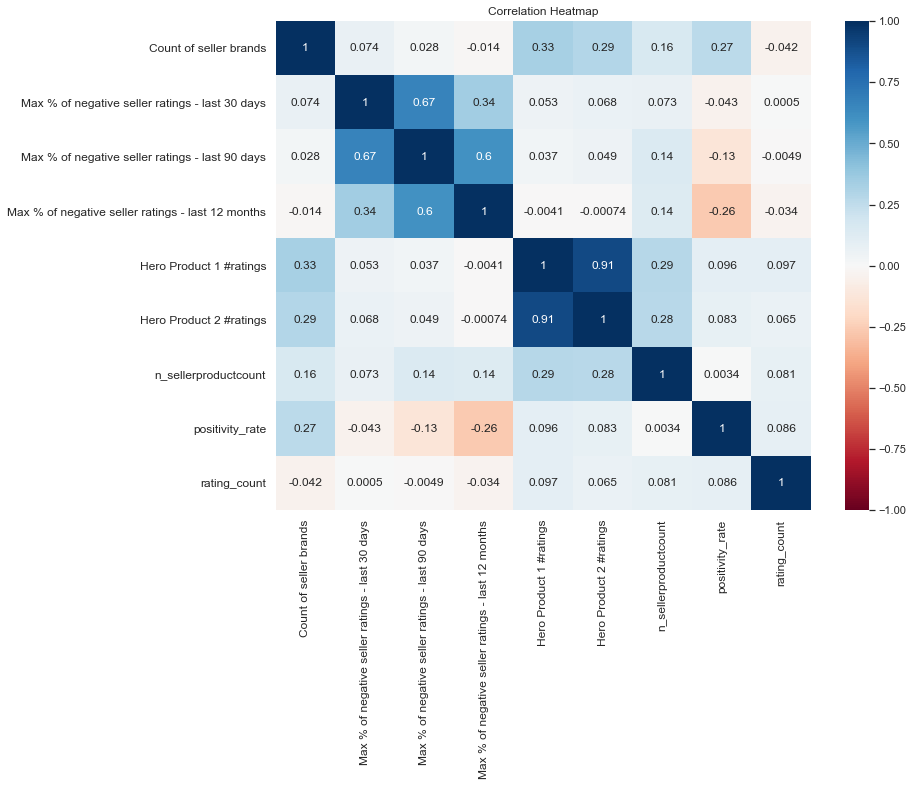

In [42]:
plt.figure(figsize = (12,9))
s = sns.heatmap(seller_df_main_feature.corr(),
               annot = True,
               cmap = 'RdBu',
                vmin = -1,
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 1.0, 'Count of seller brands vs positivity_rate')

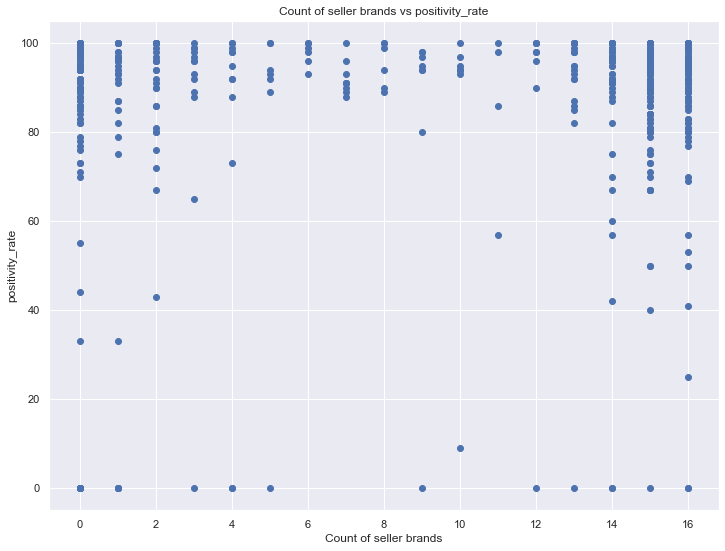

In [43]:
plt.figure(figsize=(12,9))
plt.scatter(seller_df_main_feature['Count of seller brands'],seller_df_main_feature['positivity_rate'])
plt.xlabel('Count of seller brands')
plt.ylabel('positivity_rate')
plt.title('Count of seller brands vs positivity_rate')

In [44]:
#Standardization of features to prevent weight imbalance
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(seller_df_main_feature)

In [45]:
#heirarchical clustering
hier_clust = linkage(segmentation_std, method = 'ward')

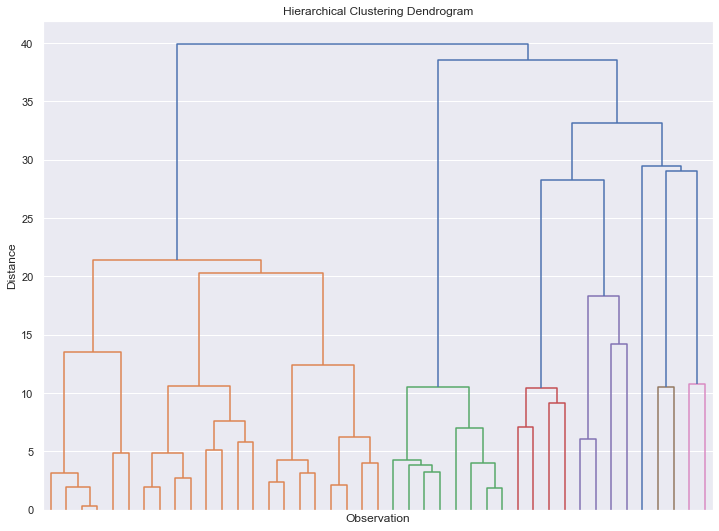

In [46]:
#Identifying possible clusters of sellers
plt.figure(figsize=(12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observation')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level',
           p = 5,
         show_leaf_counts = False,
         no_labels = True)
plt.show()

In [47]:
#Assessing Within Cluster Sum of Squares - To assess best clustering solution
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


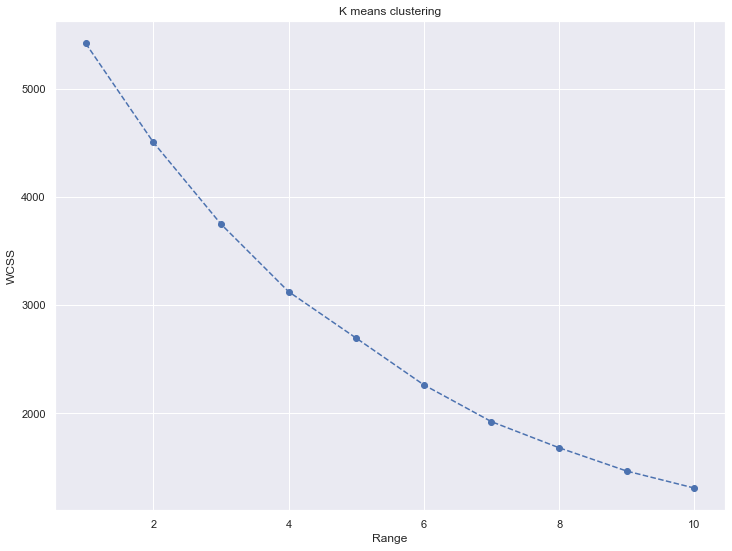

In [48]:
#Elbow method to validate Ks of cluster. 4 in this case as smoothening begins from that point.
plt.figure(figsize=(12,9))
plt.plot(range(1,11),wcss, marker ='o', linestyle ='--')
plt.title('K means clustering')
plt.xlabel('Range')
plt.ylabel('WCSS')
plt.show()

In [49]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(segmentation_std)

KMeans(n_clusters=4, random_state=42)

In [50]:
df_segm_kmeans = seller_df_main_feature.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [51]:
df_segm_kmeans.head()

,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,n_sellerproductcount,positivity_rate,rating_count,Segment K-means
sellerlink,,,,,,,,,,
Seller 1,16,17,11,12,5873,4957,100000.0,88.0,118.0,0
Seller 2,0,2,2,9,0,0,0.0,90.0,566.0,1
Seller 6,13,0,0,0,3284,2944,28.0,0.0,0.0,1
Seller 15,15,0,0,3,1446,921,919.0,97.0,116.0,0
Seller 20,0,18,20,20,0,0,0.0,76.0,3721.0,1


In [52]:
#EDA of segmented groups
df_segm_analysis = df_segm_kmeans.groupby('Segment K-means').mean()
df_segm_analysis

,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,n_sellerproductcount,positivity_rate,rating_count
Segment K-means,,,,,,,,,
0,14.599388,3.593272,4.174312,5.321101,4019.816514,2164.581040,4792.984709,91.642202,295.730887
1,1.542601,2.143498,2.753363,4.654709,241.461883,117.251121,1795.484305,75.385650,548.798206
2,15.521739,9.304348,9.130435,8.608696,46519.956522,26334.782609,40173.739130,90.434783,1677.304348
3,8.689655,45.862069,43.586207,49.000000,1250.137931,953.586207,8728.827586,55.206897,30.413793


In [53]:
#Segmented Group count and proportion
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means','n_sellerproductcount']].groupby('Segment K-means').count()
df_segm_analysis

,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,n_sellerproductcount,positivity_rate,rating_count,N Obs
Segment K-means,,,,,,,,,,
0,14.599388,3.593272,4.174312,5.321101,4019.816514,2164.581040,4792.984709,91.642202,295.730887,327
1,1.542601,2.143498,2.753363,4.654709,241.461883,117.251121,1795.484305,75.385650,548.798206,223
2,15.521739,9.304348,9.130435,8.608696,46519.956522,26334.782609,40173.739130,90.434783,1677.304348,23
3,8.689655,45.862069,43.586207,49.000000,1250.137931,953.586207,8728.827586,55.206897,30.413793,29


In [54]:
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs']/df_segm_analysis['N Obs'].sum()
df_segm_analysis

,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,n_sellerproductcount,positivity_rate,rating_count,N Obs,Prop Obs
Segment K-means,,,,,,,,,,,
0,14.599388,3.593272,4.174312,5.321101,4019.816514,2164.581040,4792.984709,91.642202,295.730887,327,0.543189
1,1.542601,2.143498,2.753363,4.654709,241.461883,117.251121,1795.484305,75.385650,548.798206,223,0.370432
2,15.521739,9.304348,9.130435,8.608696,46519.956522,26334.782609,40173.739130,90.434783,1677.304348,23,0.038206
3,8.689655,45.862069,43.586207,49.000000,1250.137931,953.586207,8728.827586,55.206897,30.413793,29,0.048173


# **Segment justification**

**Segment 0** = 54% of sellers. Avg. Positivity Rate of Ratings is 91.6%. ~15 Seller brands and Avg Catalog offering of ~4700+                 products. <5% negative ratings within past 90 days. High Hero Product Ratings. **BEST SEGMENT FOR BUSINESS**

**Segment 1** = 37% of sellers. Avg. Positivity Rate of Ratings is 75.3%. ~2 Seller brands and Avg Catalog offering of ~1700+                       products. <3% negative ratings within past 90 days. High user engagement based on >500 Avg rating count. **3rd BEST SEGMENT FOR BUSINESS**

**Segment 2** = 3.8% of sellers. Avg. Positivity Rate of Ratings is 90.4%. ~15 Seller brands and Avg Catalog offering of ~40k+                 products. ~9% negative ratings within past 90 days. High user engagement based on >1500 Avg rating count.                       Best Hero Product Engagement. **2nd BEST SEGMENT FOR BUSINESS**

**Segment 3** = 4.8% of sellers. Avg. Positivity Rate of Ratings is 55%. ~8 Seller brands and Avg Catalog offering of ~8k+                 products. ~45% negative ratings within past 90 days. Least user engagement based on <30 Avg rating count.**WORST SEGMENT FOR BUSINESS**               

**BASED ON THE ABOVE MODEL THE PRECEDENCE OF SELLER CATEGORY FOR BUSINESS OPPORTUNITY SHOULD BE 
  0 -> 2 -> 1 -> 3**

In [55]:
df_segm_analysis.rename({0:'BEST BUSINESS OPPORTUNITY',
                         1: '3rd BEST BUSINESS OPPORTUNITY',
                         2: '2nd BEST BUSINESS OPPORTUNITY',
                         3: 'WORST SEGMENT FOR BUSINESS'})

,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,n_sellerproductcount,positivity_rate,rating_count,N Obs,Prop Obs
Segment K-means,,,,,,,,,,,
BEST BUSINESS OPPORTUNITY,14.599388,3.593272,4.174312,5.321101,4019.816514,2164.581040,4792.984709,91.642202,295.730887,327,0.543189
3rd BEST BUSINESS OPPORTUNITY,1.542601,2.143498,2.753363,4.654709,241.461883,117.251121,1795.484305,75.385650,548.798206,223,0.370432
2nd BEST BUSINESS OPPORTUNITY,15.521739,9.304348,9.130435,8.608696,46519.956522,26334.782609,40173.739130,90.434783,1677.304348,23,0.038206
WORST SEGMENT FOR BUSINESS,8.689655,45.862069,43.586207,49.000000,1250.137931,953.586207,8728.827586,55.206897,30.413793,29,0.048173


In [56]:
df_segm_kmeans.head()

,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,n_sellerproductcount,positivity_rate,rating_count,Segment K-means
sellerlink,,,,,,,,,,
Seller 1,16,17,11,12,5873,4957,100000.0,88.0,118.0,0
Seller 2,0,2,2,9,0,0,0.0,90.0,566.0,1
Seller 6,13,0,0,0,3284,2944,28.0,0.0,0.0,1
Seller 15,15,0,0,3,1446,921,919.0,97.0,116.0,0
Seller 20,0,18,20,20,0,0,0.0,76.0,3721.0,1


In [57]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'BEST BUSINESS OPPORTUNITY',
                         1: '3rd BEST BUSINESS OPPORTUNITY',
                         2: '2nd BEST BUSINESS OPPORTUNITY',
                         3: 'WORST SEGMENT FOR BUSINESS'})

In [58]:
df_segm_kmeans.head(25)

,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,n_sellerproductcount,positivity_rate,rating_count,Segment K-means,Labels
sellerlink,,,,,,,,,,,
Seller 1,16,17,11,12,5873,4957,100000.0,88.0,118.0,0,BEST BUSINESS OPPORTUNITY
Seller 2,0,2,2,9,0,0,0.0,90.0,566.0,1,3rd BEST BUSINESS OPPORTUNITY
Seller 6,13,0,0,0,3284,2944,28.0,0.0,0.0,1,3rd BEST BUSINESS OPPORTUNITY
Seller 15,15,0,0,3,1446,921,919.0,97.0,116.0,0,BEST BUSINESS OPPORTUNITY
Seller 20,0,18,20,20,0,0,0.0,76.0,3721.0,1,3rd BEST BUSINESS OPPORTUNITY
Seller 21,14,0,0,0,837,787,123.0,0.0,0.0,1,3rd BEST BUSINESS OPPORTUNITY
Seller 22,0,0,7,6,0,0,0.0,92.0,181.0,1,3rd BEST BUSINESS OPPORTUNITY
Seller 23,16,0,0,0,10538,8293,40000.0,100.0,10.0,0,BEST BUSINESS OPPORTUNITY
Seller 24,15,15,12,10,30139,11182,100000.0,88.0,3134.0,2,2nd BEST BUSINESS OPPORTUNITY


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


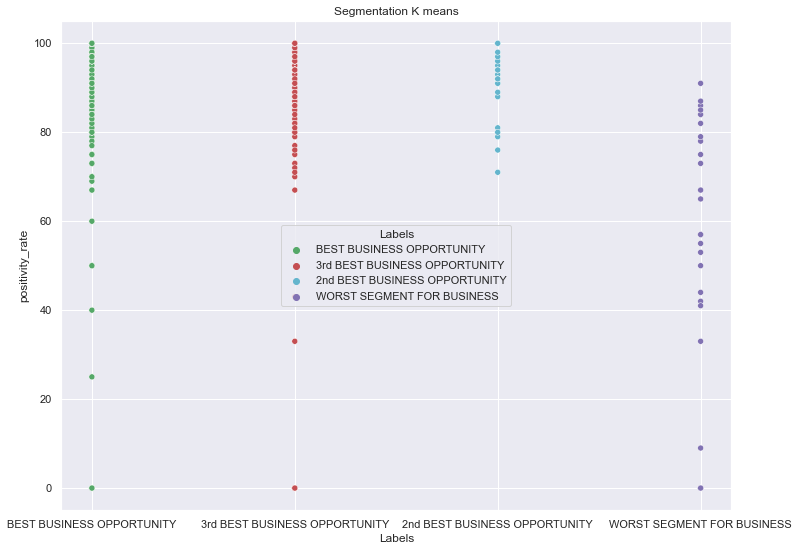

In [59]:
x_axis = df_segm_kmeans['Labels']
y_axis = df_segm_kmeans['positivity_rate']
plt.figure(figsize=(12,9))
sns.scatterplot(x_axis,y_axis, hue = df_segm_kmeans['Labels'],palette=['g', 'r', 'c', 'm'])
plt.title('Segmentation K means')
plt.show()

In [60]:
final_df = seller_df_main.merge(df_segm_kmeans, on='sellerlink')

In [61]:
#Final segmented data with contact details which can be shared with the sales team for pitch.
final_df = final_df[['sellerlink','Labels','seller_email','seller_phone','region']]
final_df.head(5)

,sellerlink,Labels,seller_email,seller_phone,region
0,Seller 1,BEST BUSINESS OPPORTUNITY,jadgemaello@gmail.com,"022-6630,208-964-6807,022-6630,208-964-6807,09...",US
1,Seller 2,3rd BEST BUSINESS OPPORTUNITY,"info@1a-handelsagentur.de,info@1a-handelsagent...","039932-8297,2237584",DE
2,Seller 6,3rd BEST BUSINESS OPPORTUNITY,Not Available,Not Available,NaN
3,Seller 15,BEST BUSINESS OPPORTUNITY,webmaster@9pm-store.de,"0151400085,2157520",DE
4,Seller 20,3rd BEST BUSINESS OPPORTUNITY,abc-markt@web.de,"0570591155,0570591156,2138231",DE
